## How to implement message chat history ##

<img src="./Image/ChatHistory.png" width="700" height="400" style="display: block; margin: auto;">

install plugin 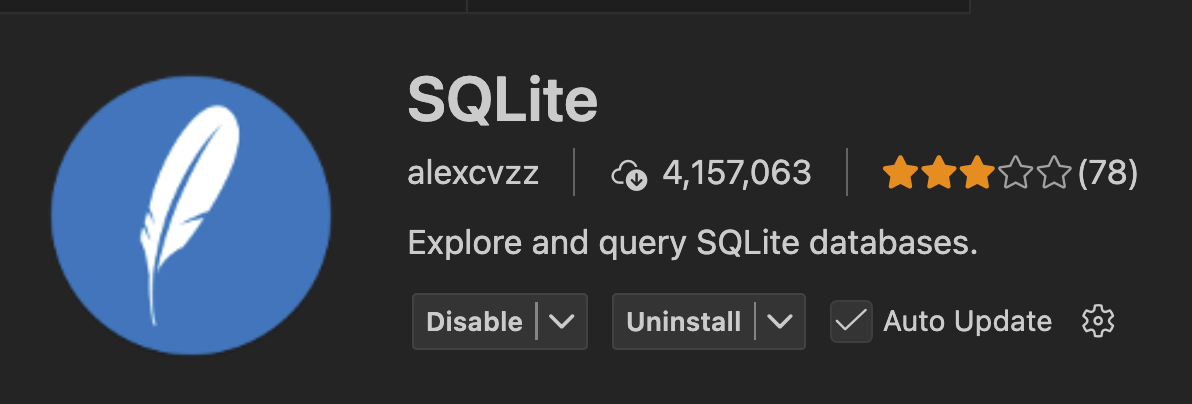

In [ ]:
%pip install langchain_community

In [ ]:
from dotenv import load_dotenv
import os
load = load_dotenv('./../.env')

from langchain_ollama import ChatOllama

llm = ChatOllama(
    base_url="http://localhost:11434",
    model = "qwen2.5:latest",
    temperature=0.5,
    max_tokens = 250
)

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import chain
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import SQLChatMessageHistory

template = ChatPromptTemplate.from_messages([
     ('placeholder', "{history}"),
    ('human', "{prompt}")
])

chain = template | llm | StrOutputParser()

store = {}

def get_session_history(session_id: str) -> SQLChatMessageHistory:
    return SQLChatMessageHistory(session_id=session_id, connection_string="sqlite:///./chat_history.db")


history = RunnableWithMessageHistory(
    chain, 
    get_session_history,
    input_messages_key="prompt",
    history_messages_key="history")

session_id = "sudha"

get_session_history(session_id).clear()

response1 = history.invoke({"prompt": "What is the distance between earth and sun?"},
                          config = {"configurable": {"session_id": session_id}})

response2 = history.invoke({"prompt": "How about from moon"},
                          config = {"configurable": {"session_id": session_id}})

print(response1)
print("\n\n")
print(response2)

<img src="./Image/image.png" width="700" height="400" style="display: block; margin: auto;">